# Practical Example

#### The system:
This notebook follows the same flow as the _standardize_analysis_ example, but for a biomolecular system I'm studying in my own research. Without going into too much detail about the project, given that the manuscript is still in prep, I'm interested in quantifying the free energy of sidechain interactions for several tripeptides in aqueous solution. This notebook contains the example of RGD, a promiscuous binding moiety in biological systems. The analysis is performed on output from the first 100 ns of a parallel-bias metadynamics simulation with 8 walkers (identical systems sharing bias, but not exchanging configurations). 

#### Procedure:
    1. import numpy, pandas, pyplot, and plumitas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plumitas as plm

    2. load PLUMED input and output files for your project

In [2]:
pbmetad_colvar = 'data/RGD/COLVAR'
pbmetad_hills = 'data/RGD/HILLS'
pbmetad_plumed = 'data/RGD/plumed.dat'

pbmetad = plm.load_project(pbmetad_colvar, pbmetad_hills, 
                           method='pbmetad', bias_type='pbmetad',
                           input_file=pbmetad_plumed, multi=True)

In [3]:
pbmetad.colvar['weight'] = pbmetad.colvar['pb.bias']

In [4]:
pbmetad.colvar['phiA2']

0        -1.413682
1        -1.522686
2        -1.691453
3        -1.069302
4        -1.473508
5        -1.159829
6        -1.337110
7        -1.591740
8        -1.046228
9        -1.017743
10       -1.126146
11       -1.124092
12       -1.010795
13       -1.245833
14       -1.347130
15       -1.287910
16       -1.234932
17       -1.146875
18       -1.203751
19       -1.385210
20       -1.134623
21       -0.950708
22       -0.997606
23       -0.950273
24       -1.000200
25       -0.764608
26       -1.087458
27       -1.472938
28       -1.307631
29       -1.468690
            ...   
99971     0.526373
99972     1.155447
99973     0.881058
99974     1.172362
99975     1.175099
99976     1.050392
99977     1.244326
99978     1.142761
99979     0.894763
99980     0.834674
99981     0.753678
99982     1.050685
99983     0.948366
99984     1.254418
99985     1.386006
99986     1.078221
99987     0.985806
99988     1.605238
99989     1.243575
99990     0.891499
99991     0.958537
99992     1.

    3. visualize collective variables (if you want)

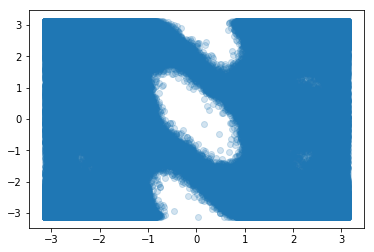

In [5]:
plt.scatter(pbmetad.hills['phiA1']['phiA1'], 
            pbmetad.hills['psiA1']['psiA1'],
            alpha=0.2)

    4. reconstruct quasistatic bias potential from simulation

In [6]:
# word of warning: this cell will take about 90 seconds to execute.
# for reference, reconstructing the quasi-static bias potential with 
# PLUMED and GROMACS took about 10 minutes. this process will scale 
# with simulation length AND system size using PLUMED and GROMACS
# whereas my approach scales only with simulation length
pbmetad.reconstruct_bias_potential()

    5. assign frame weights for unbiased ensemble

In [7]:
pbmetad.weight_frames()

    6. visualize free energy profiles

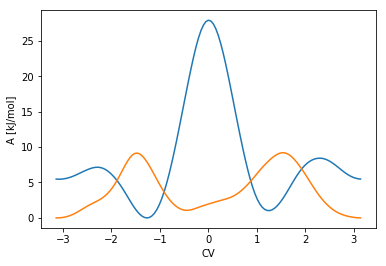

In [8]:
pbmetad.potential_of_mean_force(['phiA1', 'psiA1'])

/Users/joshsmith/Git/plumitas_examples/.env/lib/python3.6/site-packages/plumitas/core.py:369: RuntimeWarning: divide by zero encountered in log
  hist = -np.log(hist) / beta


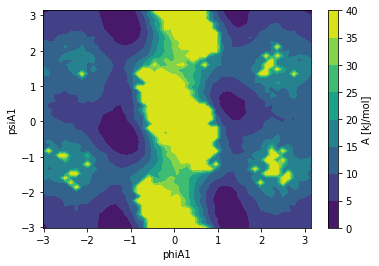

In [9]:
pbmetad.free_energy_surface('phiA1', 'psiA1', weight='weight')

'dp0n0' corresponds to the distance between the charge group center of mass for R and D sidechains. 'pseudo_dihedral0' indicates the angle between sidechains, and has been shown experimentally to correlate with binding activity. from the first 100 ns of the simulation, we can start to see preference for a stable salt bridge within the pseudo-dihedral range required for RGD binding.

/Users/joshsmith/Git/plumitas_examples/.env/lib/python3.6/site-packages/plumitas/core.py:369: RuntimeWarning: divide by zero encountered in log
  hist = -np.log(hist) / beta


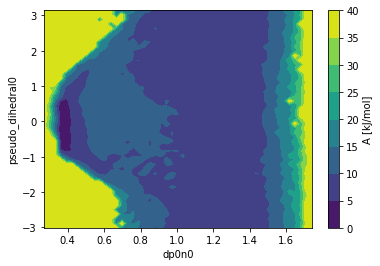

In [10]:
pbmetad.free_energy_surface('dp0n0', 'pseudo_dihedral0', weight='weight',
                           bins=50)

In [15]:
pbmetad.colvar.columns

Index(['dp0n0', 'psiA0', 'phiA1', 'psiA1', 'phiA2', 'coord_H', 'coord_O',
       'pseudo_dihedral0', 'pb.bias', 'weight'],
      dtype='object')